<a href="https://colab.research.google.com/github/EugeniaE/UTS_ML2019_Main/blob/master/As2_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Multiclass image classification problem using Neural Networks

Dataset was taken in Kaggle: 
https://www.kaggle.com/puneet6060/intel-image-classification

### Import required packages

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os

base_dir = '/content/gdrive/My Drive/ML_Assignment2/ML_Intel_Image_Dataset'
train_dir = os.path.join(base_dir, 'seg_train')
validation_dir = os.path.join(base_dir, 'seg_test')

# Directory with our training building pictures
train_bld_dir = os.path.join(train_dir, 'buildings')
# Directory with our training forest pictures
train_for_dir = os.path.join(train_dir, 'forest')
# Directory with our training glasier pictures
train_glc_dir = os.path.join(train_dir, 'glacier')
# Directory with our training mountain pictures
train_mnt_dir = os.path.join(train_dir, 'mountain')
# Directory with our training sea pictures
train_sea_dir = os.path.join(train_dir, 'sea')
# Directory with our training street pictures
train_str_dir = os.path.join(train_dir, 'street')

# Directory with our training building pictures
validation_bld_dir = os.path.join(validation_dir, 'buildings')
# Directory with our training forest pictures
validation_for_dir = os.path.join(validation_dir, 'forest')
# Directory with our training glacier pictures
validation_glc_dir = os.path.join(validation_dir, 'glacier')
# Directory with our training mountain pictures
validation_mnt_dir = os.path.join(validation_dir, 'mountain')
# Directory with our training sea pictures
validation_sea_dir = os.path.join(validation_dir, 'sea')
# Directory with our training street pictures
validation_str_dir = os.path.join(validation_dir, 'street')

##CNN Model

In [7]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512,activation='relu'),
  tf.keras.layers.Dense(6,activation='sigmoid'), 
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

##Prepare images with ImageDataGenerator

In [15]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255) 
test_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size= (150,150), 
        batch_size=20,
        class_mode='sparse')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150), 
        batch_size=20,
        class_mode='sparse' 
) 

Found 14042 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [16]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/50
100/100 - 702s - loss: 1.4827 - acc: 0.4060 - val_loss: 1.2328 - val_acc: 0.4900
Epoch 2/50
100/100 - 422s - loss: 1.2081 - acc: 0.5295 - val_loss: 1.2036 - val_acc: 0.5390
Epoch 3/50
100/100 - 459s - loss: 1.1203 - acc: 0.5730 - val_loss: 1.0743 - val_acc: 0.5640
Epoch 4/50
100/100 - 480s - loss: 1.0813 - acc: 0.5745 - val_loss: 1.0898 - val_acc: 0.5620
Epoch 5/50
100/100 - 479s - loss: 1.0029 - acc: 0.6035 - val_loss: 1.0223 - val_acc: 0.5910
Epoch 6/50
100/100 - 460s - loss: 1.0062 - acc: 0.6060 - val_loss: 0.9669 - val_acc: 0.6280
Epoch 7/50
100/100 - 479s - loss: 0.9307 - acc: 0.6395 - val_loss: 0.8905 - val_acc: 0.6570
Epoch 8/50
100/100 - 19s - loss: 0.8840 - acc: 0.6645 - val_loss: 1.0341 - val_acc: 0.6090
Epoch 9/50
100/100 - 8s - loss: 0.9053 - acc: 0.6550 - val_loss: 0.9325 - val_acc: 0.6310
Epoch 10/50
100/100 - 8s - loss: 0.8516 - acc: 0.6770 - val_loss: 1.0138 - val_acc: 0.6450
Epoch 11/50
100/100 - 8s - loss: 0.8519 - acc: 0.6825 - val_loss: 0.8975 - val_acc: 

### Visualisation of result

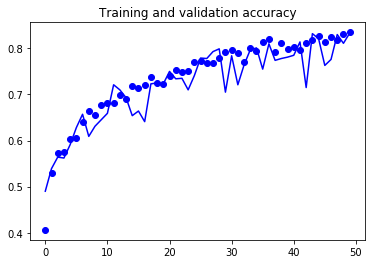

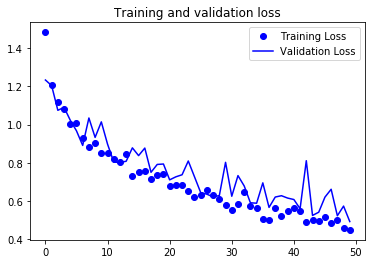

In [17]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
model_data_aug = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512,activation='relu'),
  tf.keras.layers.Dense(6,activation='sigmoid'), 
])

In [19]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1/255) 

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='sparse')

Found 14042 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [20]:
model_data_aug.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

history = model_data_aug.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/50
100/100 - 173s - loss: 1.5236 - acc: 0.3790 - val_loss: 1.4921 - val_acc: 0.4070
Epoch 2/50
100/100 - 18s - loss: 1.3227 - acc: 0.4645 - val_loss: 1.2452 - val_acc: 0.5170
Epoch 3/50
100/100 - 18s - loss: 1.2024 - acc: 0.5275 - val_loss: 1.2119 - val_acc: 0.5340
Epoch 4/50
100/100 - 17s - loss: 1.1890 - acc: 0.5070 - val_loss: 1.1890 - val_acc: 0.5290
Epoch 5/50
100/100 - 17s - loss: 1.1694 - acc: 0.5425 - val_loss: 1.0386 - val_acc: 0.5950
Epoch 6/50
100/100 - 17s - loss: 1.1059 - acc: 0.5545 - val_loss: 0.9572 - val_acc: 0.6400
Epoch 7/50
100/100 - 17s - loss: 1.0858 - acc: 0.5706 - val_loss: 0.9670 - val_acc: 0.6140
Epoch 8/50
100/100 - 19s - loss: 1.0923 - acc: 0.5735 - val_loss: 1.0116 - val_acc: 0.5950
Epoch 9/50
100/100 - 17s - loss: 1.0588 - acc: 0.5835 - val_loss: 1.0421 - val_acc: 0.6000
Epoch 10/50
100/100 - 17s - loss: 1.0129 - acc: 0.6215 - val_loss: 0.9073 - val_acc: 0.6420
Epoch 11/50
100/100 - 17s - loss: 1.0446 - acc: 0.5880 - val_loss: 0.8717 - val_acc: 0.6

###Visualisation of result

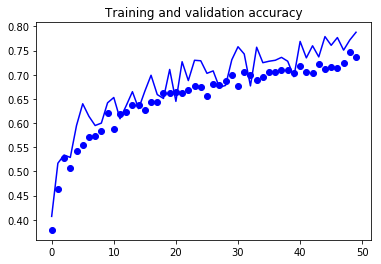

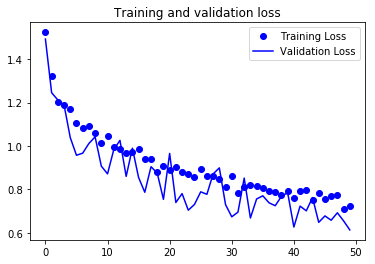

In [21]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()